In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
import numpy as np

from tensorflow_hmm import hmm

In [3]:
x = np.arange(0, 100, 1)
truth = np.array((x / 10) % 2, dtype=float)
y = (truth + np.random.random(truth.shape) * 2.5)
y /= np.max(y)

In [4]:
y.shape

(100,)

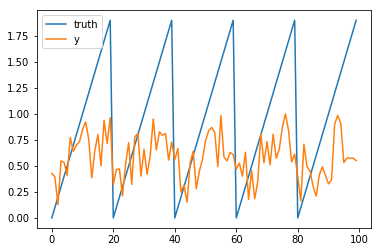

In [5]:
plot(truth, label='truth')
plot(y, label='y')
legend()

In [6]:
# hmm_tf = hmm.HMMTensorflow(np.array([[0.5, 0.5], [0.5, 0.5]]))
hmm_tf = hmm.HMMTensorflow(np.array([[0.9, 0.1], [0.1, 0.9]]))
hmm_np = hmm.HMMNumpy(np.array([[0.9, 0.1], [0.1, 0.9]]))

In [7]:
np.vstack([1-y,y]).T.shape

(100, 2)

In [8]:
test_a = np.array([1,2,3])
print(test_a)
test_a.shape

[1 2 3]


(3,)

In [9]:
b = np.vstack((test_a, 1-test_a))
print(b)
b.shape

[[ 1  2  3]
 [ 0 -1 -2]]


(2, 3)

In [10]:
def lik(y):
    """ given 1d vector of likliehoods length N, return matrix with
    shape (N, 2) where (N, 0) is 1 - y and (N, 1) is y.

    This makes it easy to convert a time series of probabilities
    into 2 states, off/on, for a simple HMM.
    """

    return np.vstack([1 - y, y]).T

In [11]:
lik(y).shape

(100, 2)

In [12]:
np_s, np_scores = hmm_np.viterbi_decode(lik(y))

/home/ros/data/IPython/tensorflow_hmm/tensorflow_hmm/hmm.py:125: RuntimeWarning: divide by zero encountered in log
  pathScores[t + 1] = np.max(tmpMat, 0) + np.log(yy)


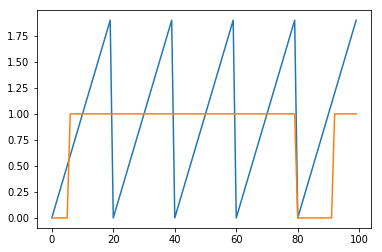

In [13]:
plot(truth)
plot(np_s)

In [14]:
# tf_s_graph, tf_scores_graph = hmm_tf.viterbi_decode(lik(y), len(y))
tf_s_graph, tf_scores_graph = hmm_tf.viterbi_decode(lik(y))

tf_s = tf.Session().run(tf_s_graph)
# tf_scores = [tf_scores_graph[0]]

tf_scores = tf.Session().run(tf_scores_graph)


# print np.array(tf_scores)
print(np.array(tf_scores))

/home/ros/data/IPython/tensorflow_hmm/tensorflow_hmm/hmm.py:327: RuntimeWarning: divide by zero encountered in log
  pathScores.append(tf.reduce_max(tmpMat, 0) + np.log(yy))


[[ -1.25236799  -1.54097192]
 [ -1.86086298  -2.57427203]
 [ -2.10339624  -4.73394951]
 [ -3.00331055  -5.00706507]
 [ -3.87042981  -5.74136806]
 [ -4.49870317  -6.74515815]
 [ -6.08871025  -7.05822445]
 [ -7.21995462  -7.60749913]
 [ -8.52406165  -8.07178285]
 [ -9.9448515   -8.48960885]
 [-11.93870203  -8.75901902]
 [-13.62276223  -8.94473887]
 [-12.67767442  -9.32351714]
 [-12.11305519 -10.38208129]
 [-13.25519668 -10.92531801]
 [-14.84457527 -11.2520217 ]
 [-14.25039047 -12.04789989]
 [-17.13225303 -12.21718999]
 [-15.77915342 -12.65638885]
 [-18.25206632 -12.79959543]
 [-15.48524223 -14.04993953]
 [-16.21847833 -14.91827861]
 [-16.95946347 -15.77782082]
 [-17.30271201 -17.43572383]
 [-18.14049717 -18.19643871]
 [-19.5310218  -18.6255994 ]
 [-20.02552    -19.86304933]
 [-21.64417743 -20.2171057 ]
 [-23.41879299 -20.53119834]
 [-23.34846215 -21.54709774]
 [-24.53345152 -22.06755199]
 [-24.91431578 -23.04117107]
 [-25.9257049  -23.66425765]
 [-28.99009302 -23.81948394]
 [-27.1783162 

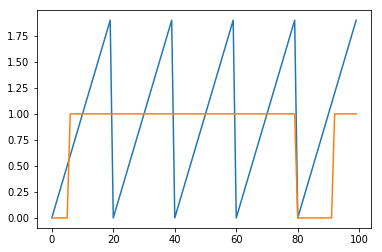

In [15]:
plot(truth)
plot(tf_s)

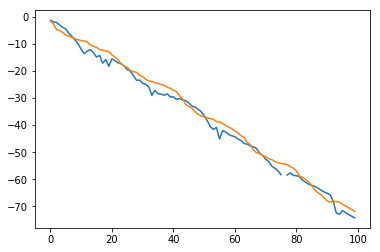

In [16]:
plot(tf_scores)

In [17]:
g_posterior, _, _ = hmm_tf.forward_backward(lik(y))

tf_posterior = np.concatenate(tf.Session().run(g_posterior))

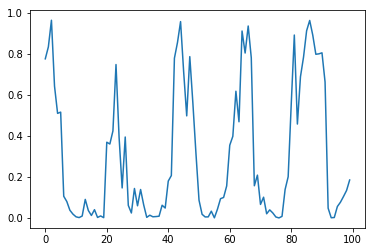

In [18]:
plot(tf_posterior[:,0])